In [1]:
import pandas as pd
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split,learning_curve,cross_val_predict
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import os
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn.metrics as met
import math
import matplotlib
import numpy as np

In [2]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 99999;   //设置输出>9999时才出现滑动窗口
IPython.OutputArea.prototype._should_scroll = function(){return false}  // 设置不出现滑动窗口 true, auto, false 

<IPython.core.display.Javascript object>

In [3]:
def plot_scatter(y,y_pred):
    
    plt.figure(figsize=(8,8))
    plt.scatter(y,y_pred)
    xp = [min(y_pred), max(y_pred)]
    yp = xp
    plt.plot(xp,yp,'r-')
    plt.xlabel('True IC50')
    plt.ylabel('Estimated IC50')
    #plt.title(drug_name)
    plt.text(min(y_pred),max(y_pred), 'pearsonr={:.3f}, pvalue={:.2e}'.format(pearsonr(y_pred,y)[0], pearsonr(y_pred,y)[1]))
    plt.grid()
    #plt.savefig(drug_name+".5fold.png")
    plt.show()

In [4]:
df_exp=pd.read_csv('gdsc_exp.csv',encoding="ISO-8859-1")
print( ' sample of dataset : ', df_exp.shape[0], ', num of genes  : ', df_exp.shape[1] )
df_ic50=pd.read_csv('gdsc_drug.csv')
df_auc=pd.read_csv('gdsc_auc.csv')
genename=df_exp.iloc[:,0]
df_exp=df_exp.iloc[:,1:]
df_exp.index=genename

 sample of dataset :  17737 , num of genes  :  1019


In [5]:
drug_name='17-AAG'
alpha_ic50=[0.06]
alpha_auc=[0.005]

In [6]:
drug_name='AZD-0530'
alpha_ic50=[0.06]
alpha_auc=[0.003]

In [23]:
drug_name='AZD6244'
alpha_ic50=[0.03]
alpha_auc=[0.003]

In [27]:
drug_name='Erlotinib'
alpha_ic50=[0.1]
alpha_auc=[0.007]

In [31]:
drug_name='Lapatinib'
alpha_ic50=[0.0005]
alpha_auc=[0.000035]

In [35]:
drug_name='Nilotinib'
alpha_ic50=[0.025]
alpha_auc=[0.001]

In [39]:
drug_name='Nutlin-3a'
alpha_ic50=[0.023]
alpha_auc=[0.001]

In [43]:
drug_name='PD-0325901'
alpha_ic50=[0.06]
alpha_auc=[0.005]

In [47]:
drug_name='PD-0332991'
alpha_ic50=[0.06]
alpha_auc=[0.004]

In [52]:
drug_name='PHA-665752'
alpha_ic50=[0.0006]
alpha_auc=[0.000027]

In [56]:
drug_name='PLX4720'
alpha_ic50=[0.02]
alpha_auc=[0.0009]

In [60]:
drug_name='Sorafenib'
alpha_ic50=[0.0005]
alpha_auc=[0.000028]

In [7]:
for k in range(len(alpha_ic50)):
    one_drug_ic50=pd.DataFrame([str(x) for x in list(df_ic50['Cell line cosmic identifiers'])])
    one_drug_ic50['ic50']=list(df_ic50[drug_name])
    one_drug_ic50.columns=['id','ic50']
    drug_data_ic50=one_drug_ic50.dropna(axis=0)['ic50']
    drug_data_ic50.index=one_drug_ic50.dropna(axis=0)['id']
    common_id_ic50=list(set(drug_data_ic50.index)&set(df_exp.columns))
    common_id_ic50.sort(reverse=False,key=int)


    exp_ic50=df_exp[common_id_ic50]
    exp_ic50.index=genename
    drug_ic50=drug_data_ic50[common_id_ic50]
    full_df_ic50=(exp_ic50.append(drug_ic50)).T
    X_ic50=full_df_ic50.iloc[:,0:17737]
    y_ic50=full_df_ic50['ic50']

    X_train_ic50,X_test_ic50,y_train_ic50,y_test_ic50=train_test_split(X_ic50,y_ic50,test_size=0.2,random_state=1)
    print( ' sample of dataset : ', X_ic50.shape[0], ', num of genes  : ', X_ic50.shape[1] )
    print()
    print('------------------------------------------')
    print()



    from scipy.stats import pearsonr
    pval=[]

    for n in X_train_ic50.columns:
        cor=pearsonr(X_train_ic50[n],y_train_ic50)[1]
        pval.append(cor)

    #print(len(pval))

    per_ind=[]   
    for j in range(X_train_ic50.shape[1]):        
        if pval[j] < 0.05 :            
            per_ind.append(j)        
        else:
            pass


    ind_ic50=X_ic50.columns[per_ind]
    X_train_ic50_1=X_train_ic50[ind_ic50]
    #print(len(ind))
    print( ' gene num after PCC : ', len(ind_ic50) )
    print()
    #     print(X_train_1)




    sel_ic50=ElasticNet(alpha=alpha_ic50[k],l1_ratio=0.5)
    sel_ic50.fit(X_train_ic50_1,y_train_ic50)
    coef_ic50 = pd.Series(sel_ic50.coef_, index = X_train_ic50_1.columns) 
    print("ElasticNet picked " + str(sum(coef_ic50 != 0)) + " variables and eliminated the other " +  
              str(sum(coef_ic50 == 0)) + " variables")

    EN_features_ic50=(coef_ic50[coef_ic50 != 0]).index
    X_train__ic50_2=X_train_ic50_1[EN_features_ic50]
    #print(EN_features)
    #df=pd.DataFrame(EN_features_ic50)
    
    
    one_drug_auc=pd.DataFrame([str(x) for x in list(df_auc['Cell line cosmic identifiers'])])
    one_drug_auc['auc']=list(df_auc[drug_name])
    one_drug_auc.columns=['id','auc']
    drug_data_auc=one_drug_auc.dropna(axis=0)['auc']
    drug_data_auc.index=one_drug_auc.dropna(axis=0)['id']
    common_id_auc=list(set(drug_data_auc.index)&set(df_exp.columns))
    common_id_auc.sort(reverse=False,key=int)

    #

    exp_auc=df_exp[common_id_auc]
    exp_auc.index=genename
    drug_auc=drug_data_auc[common_id_auc]
    full_df_auc=(exp_auc.append(drug_auc)).T
    X_auc=full_df_auc.iloc[:,0:17737]
    y_auc=full_df_auc['auc']

    X_train_auc,X_test_auc,y_train_auc,y_test_auc=train_test_split(X_auc,y_auc,test_size=0.2,random_state=1)
    print( ' sample of dataset : ', X_auc.shape[0], ', num of genes  : ', X_auc.shape[1] )
    print()
    print('------------------------------------------')
    print()



    from scipy.stats import pearsonr
    pval=[]

    for n in X_train_auc.columns:
        cor=pearsonr(X_train_auc[n],y_train_auc)[1]
        pval.append(cor)

    #print(len(pval))

    per_ind=[]   
    for j in range(X_train_auc.shape[1]):        
        if pval[j] < 0.05 :            
            per_ind.append(j)        
        else:
            pass


    ind_auc=X_auc.columns[per_ind]
    X_train_auc_1=X_train_auc[ind_auc]
    #print(len(ind))
    print( ' gene num after PCC : ', len(ind_auc) )
    print()
    #     print(X_train_1)




    sel_auc=ElasticNet(alpha=alpha_auc[k],l1_ratio=0.5)
    sel_auc.fit(X_train_auc_1,y_train_auc)
    coef_auc = pd.Series(sel_auc.coef_, index = X_train_auc_1.columns) 
    print("ElasticNet picked " + str(sum(coef_auc != 0)) + " variables and eliminated the other " +  
              str(sum(coef_auc == 0)) + " variables")

    EN_features_auc=(coef_auc[coef_auc != 0]).index
    X_train_auc_2=X_train_auc_1[EN_features_auc]
    #print(EN_features)
    #df=pd.DataFrame(EN_features_ic50)

    common_gene=list(set(EN_features_ic50)&set(EN_features_auc))
    print( 'num of common gene : ',len(common_gene))
    #print(common_gene)
    exp=pd.DataFrame(X_ic50[common_gene])
    #print(df)
    #df.to_csv(drug_name,'_com.csv')
    #pd.DataFrame(common_gene).to_csv(drug_name+'_gene.csv')
    
    
    regressor_ic50=ElasticNet(alpha=alpha_ic50[k],l1_ratio=0.5)
    regressor_ic50.fit(X_train_ic50[common_gene],y_train_ic50)
    importance = np.abs(regressor_ic50.coef_) 
    df_ic50=pd.DataFrame(columns=['gene name','importance','coef'])
    df_ic50['gene name']=common_gene
    df_ic50['importance']=list(importance)
    df_ic50['coef']=list(regressor_ic50.coef_)
    df_ic50=df_ic50.sort_values(by=['importance'],ascending=False)
    #print(df_ic50)
    
    
    
    regressor_auc=ElasticNet(alpha=alpha_auc[k],l1_ratio=0.5)
    regressor_auc.fit(X_train_auc[common_gene],y_train_auc)
    importance = np.abs(regressor_auc.coef_) 
    df_auc=pd.DataFrame(columns=['gene name','importance','coef'])
    df_auc['gene name']=common_gene
    df_auc['importance']=list(importance)
    df_auc['coef']=list(regressor_auc.coef_)
    df_auc=df_auc.sort_values(by=['importance'],ascending=False)
    #print(df_auc)

 sample of dataset :  396 , num of genes  :  17737

------------------------------------------

 gene num after PCC :  3379

ElasticNet picked 218 variables and eliminated the other 3161 variables
 sample of dataset :  396 , num of genes  :  17737

------------------------------------------

 gene num after PCC :  3565

ElasticNet picked 214 variables and eliminated the other 3351 variables
num of common gene :  80
                  gene name  importance      coef
66     ARL9|ENSG00000196503    0.209991  0.209991
41   PLGRKT|ENSG00000107020    0.156176  0.156176
78    DERL3|ENSG00000099958    0.155728  0.155728
57  OLFML2A|ENSG00000185585    0.139830 -0.139830
9    CREBL2|ENSG00000111269    0.131235  0.131235
..                      ...         ...       ...
64      ADM|ENSG00000148926    0.002756  0.002756
67   IGFBP3|ENSG00000146674    0.000000  0.000000
15     TPM4|ENSG00000167460    0.000000  0.000000
61    CCL28|ENSG00000151882    0.000000 -0.000000
23  PSTPIP2|ENSG00000152229    

In [62]:
# df_ic50.to_csv(drug_name+'_importance for pred ic50.csv')
# df_auc.to_csv(drug_name+'_importance for pred auc.csv')

In [8]:
dr_br=pd.read_csv('dr_bin.csv')
dr_br.drop_duplicates(subset=['Cosmic sample Id'],keep='first',inplace=True)
df=dr_br.iloc[:984,3:]
df.index=list([int(x) for x in dr_br.iloc[:984,0]])

In [9]:
df1=pd.DataFrame(df[drug_name].dropna(axis=0))
df1.columns=['type']
len(np.unique(df1.index))
df1.index=[str(x) for x in df1.index]

In [10]:
ind=list(exp.index)
overlapped=list(set(list([str(x) for x in df1.index]))&set(ind))
len(overlapped)

382

In [11]:
sel=exp.T[overlapped]
sel.columns=overlapped
sel=sel.T


In [12]:
df1.index=[str(x) for x in df1.index]

In [13]:
df1.T[overlapped]

,905977,905972,907275,1240128,909698,907270,910910,906869,683665,753596,...,688023,906794,910695,910861,1297439,1295741,688007,1240182,1327774,687997
type,R,S,R,R,R,R,R,S,R,R,...,R,R,S,R,R,R,R,R,S,R


In [14]:
sel_dr=df1.T[overlapped]
sel_dr.columns=overlapped
sel_dr=sel_dr.T
sel['type']=list(sel_dr['type'])

In [15]:
sel_sort=sel.sort_values("type",ascending=False)
#sel_sort.to_csv('x.csv')
sel_sort

Unnamed: 0,ZNF69|ENSG00000198429,TIAM2|ENSG00000146426,CTSH|ENSG00000103811,C19orf33|ENSG00000167644,HK2|ENSG00000159399,COL1A2|ENSG00000164692,CLIC3|ENSG00000169583,HOMER3|ENSG00000051128,TPM2|ENSG00000198467,CREBL2|ENSG00000111269,...,VCAM1|ENSG00000162692,AAMDC|ENSG00000087884,CXXC5|ENSG00000171604,EPYC|ENSG00000083782,CDH6|ENSG00000113361,DDIT4|ENSG00000168209,MXRA5|ENSG00000101825,DERL3|ENSG00000099958,BAG2|ENSG00000112208,type
925343,3.587363,5.580276,3.213651,9.615610,5.006612,11.678893,9.241613,7.476182,8.051510,7.053094,...,3.269571,7.472177,8.095271,2.687030,6.667454,9.075583,2.822930,3.089807,8.193299,S
753548,6.557058,4.725595,9.606325,3.303340,6.832624,3.160715,3.023252,4.554205,4.085329,5.504653,...,2.793861,6.869096,11.142446,2.939152,3.033477,10.625958,2.894188,3.670973,8.451537,S
910920,3.904489,3.530447,5.380551,8.826728,7.760524,3.140438,2.938929,5.869097,4.267597,7.985149,...,9.665890,6.990530,9.227322,2.836552,5.476778,11.745648,2.747730,4.265916,4.133597,S
753558,4.640597,4.151409,5.358446,9.100390,3.877335,3.114506,3.390972,6.217771,3.740761,6.975367,...,3.472889,5.943617,10.174481,2.942103,7.128586,10.210704,2.750595,3.435071,8.201061,S
753577,2.851308,4.976809,9.090416,7.838329,4.735811,3.514826,3.544474,5.311077,7.734521,7.038484,...,10.296333,5.699015,6.135976,2.781500,3.941146,10.135916,5.142352,3.236185,7.980811,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684059,3.643762,3.841532,3.584731,2.839578,6.450901,3.048495,2.824080,5.702049,6.264238,7.054226,...,2.954728,5.527839,7.722749,2.940956,3.073789,10.082589,2.824882,3.243626,6.707769,R
906832,2.925687,4.072797,6.029699,2.854033,7.381658,3.149240,2.940224,3.556587,4.146763,6.831996,...,3.091698,6.457282,8.635346,2.997898,3.031208,8.152102,2.919486,3.842806,8.360038,R
1331038,5.722433,4.347009,3.970614,2.817019,7.282735,3.336542,2.886950,3.465363,6.068858,7.437394,...,2.939066,6.519296,6.512128,2.900864,3.272575,8.667088,2.919253,3.599256,6.978953,R
908454,4.165232,5.699734,6.975646,2.997288,7.325432,9.566017,2.962570,5.813155,6.673565,8.760376,...,2.960451,6.200167,8.095180,2.724180,4.348829,7.703711,3.128279,3.283962,7.260788,R


In [16]:
X=sel_sort.iloc[0:,0:len(sel_sort.columns)-1]
#X.to_csv('x.csv')
X

Unnamed: 0,ZNF69|ENSG00000198429,TIAM2|ENSG00000146426,CTSH|ENSG00000103811,C19orf33|ENSG00000167644,HK2|ENSG00000159399,COL1A2|ENSG00000164692,CLIC3|ENSG00000169583,HOMER3|ENSG00000051128,TPM2|ENSG00000198467,CREBL2|ENSG00000111269,...,SIGLEC6|ENSG00000105492,VCAM1|ENSG00000162692,AAMDC|ENSG00000087884,CXXC5|ENSG00000171604,EPYC|ENSG00000083782,CDH6|ENSG00000113361,DDIT4|ENSG00000168209,MXRA5|ENSG00000101825,DERL3|ENSG00000099958,BAG2|ENSG00000112208
925343,3.587363,5.580276,3.213651,9.615610,5.006612,11.678893,9.241613,7.476182,8.051510,7.053094,...,2.652213,3.269571,7.472177,8.095271,2.687030,6.667454,9.075583,2.822930,3.089807,8.193299
753548,6.557058,4.725595,9.606325,3.303340,6.832624,3.160715,3.023252,4.554205,4.085329,5.504653,...,8.130376,2.793861,6.869096,11.142446,2.939152,3.033477,10.625958,2.894188,3.670973,8.451537
910920,3.904489,3.530447,5.380551,8.826728,7.760524,3.140438,2.938929,5.869097,4.267597,7.985149,...,2.654962,9.665890,6.990530,9.227322,2.836552,5.476778,11.745648,2.747730,4.265916,4.133597
753558,4.640597,4.151409,5.358446,9.100390,3.877335,3.114506,3.390972,6.217771,3.740761,6.975367,...,2.820651,3.472889,5.943617,10.174481,2.942103,7.128586,10.210704,2.750595,3.435071,8.201061
753577,2.851308,4.976809,9.090416,7.838329,4.735811,3.514826,3.544474,5.311077,7.734521,7.038484,...,2.655066,10.296333,5.699015,6.135976,2.781500,3.941146,10.135916,5.142352,3.236185,7.980811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684059,3.643762,3.841532,3.584731,2.839578,6.450901,3.048495,2.824080,5.702049,6.264238,7.054226,...,2.721326,2.954728,5.527839,7.722749,2.940956,3.073789,10.082589,2.824882,3.243626,6.707769
906832,2.925687,4.072797,6.029699,2.854033,7.381658,3.149240,2.940224,3.556587,4.146763,6.831996,...,2.822808,3.091698,6.457282,8.635346,2.997898,3.031208,8.152102,2.919486,3.842806,8.360038
1331038,5.722433,4.347009,3.970614,2.817019,7.282735,3.336542,2.886950,3.465363,6.068858,7.437394,...,2.793715,2.939066,6.519296,6.512128,2.900864,3.272575,8.667088,2.919253,3.599256,6.978953
908454,4.165232,5.699734,6.975646,2.997288,7.325432,9.566017,2.962570,5.813155,6.673565,8.760376,...,2.801710,2.960451,6.200167,8.095180,2.724180,4.348829,7.703711,3.128279,3.283962,7.260788


In [17]:
data2=(X-X.min())*100

In [20]:
label=sel_sort['type']
target=pd.factorize(label)
y=target[0]


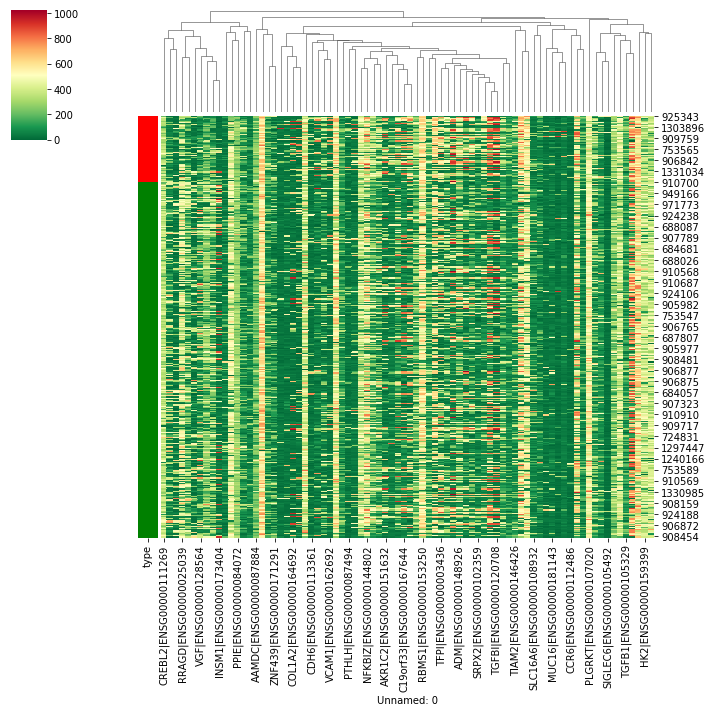

In [21]:
lut = dict(zip(label.unique(), 'rg'))
row_colors = label.map(lut)
#print(row_colors)
#metric="correlation"
sns.clustermap(data2.astype(float) ,cmap='RdYlGn_r',metric="correlation",row_colors=row_colors,row_cluster=None)
#plt.savefig(drug_name+'_cluster_100.png')